In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Set Arial as the default font
plt.rcParams['font.family'] = 'Arial'


# Line Plot

In [116]:
xlsx_path = '/Users/baileyng/MIND_data/Cognitive Model Results (Formatted) 3.xlsx'
sheets = pd.read_excel(xlsx_path, sheet_name=None)

In [117]:
model_col = 'Model'
data_col = 'Data'
r2_col = 'R-squared'
std_col = 'R-squared (std)'

print(sheets.keys())

dict_keys(['GF', 'PAL', 'DSST', 'TMT'])


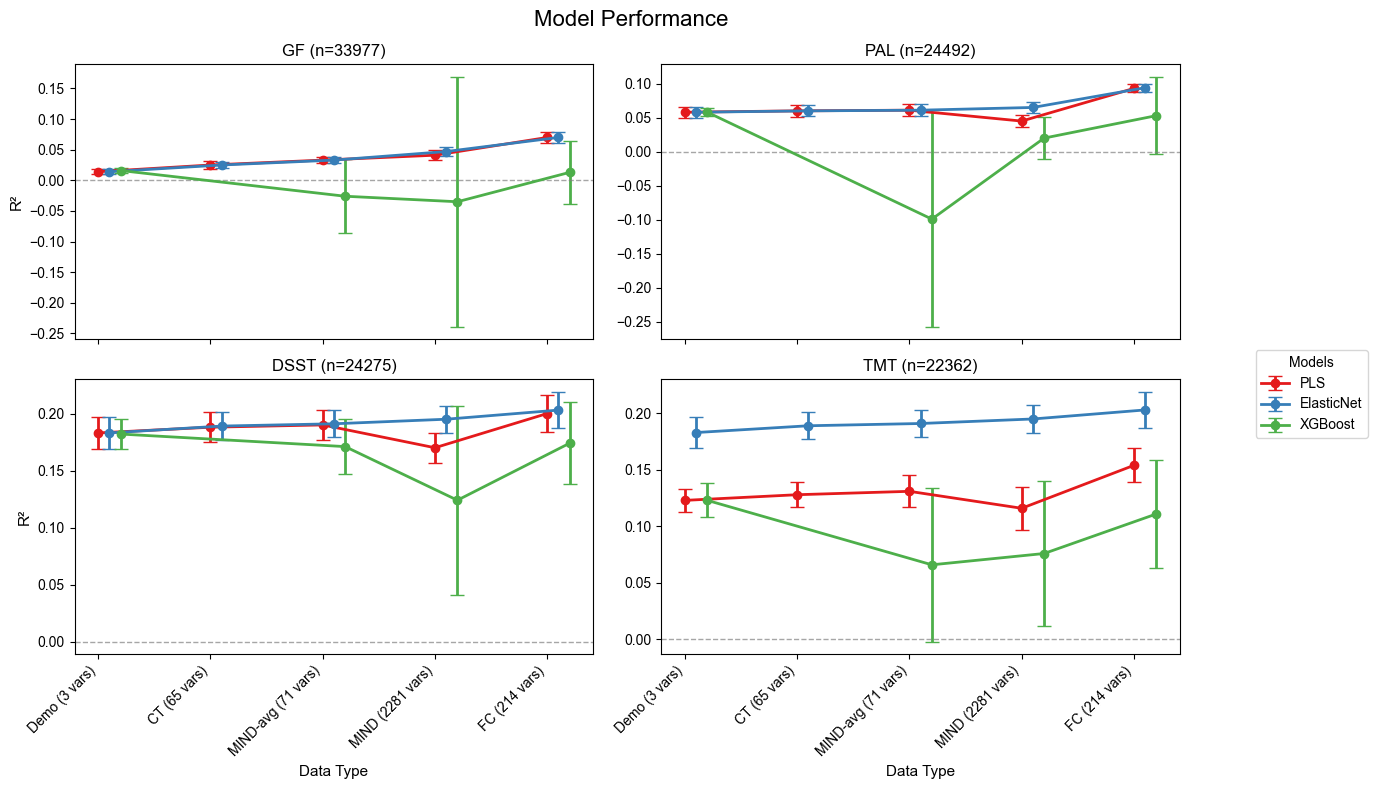

In [118]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # Convert 2D array to 1D for easier indexing

data_order = ['Demo', 'CT', 'MIND-avg', 'MIND', 'FC']

# Number of variables for each data type
num_vars = {'Demo': 3, 'CT': 65, 'MIND-avg': 71, 'MIND': 2281, 'FC': 214}

# Create labels with variable counts
data_labels = [f'{data_type} ({num_vars[data_type]} vars)' for data_type in data_order]

# Sample sizes for each subplot
sample_sizes = [33977, 24492, 24275, 22362]

# Get handles and labels from the first subplot for the legend
handles, labels = None, None

for idx, (sheet_name, df) in enumerate(sheets.items()):
    ax = axes[idx]
    
    unique_models = df[model_col].unique()
    colors = plt.cm.Set1(range(len(unique_models)))

    base_positions = range(len(data_order))
    shift_amount = 0.1

    for i, model in enumerate(unique_models):
        model_df = df[df[model_col] == model]

        x_positions = []
        y_values = []
        y_errors = []

        shifted_position = [pos + i * shift_amount for pos in base_positions]

        for j, data_type in enumerate(data_order):
            row = model_df[model_df[data_col] == data_type]
            if not row.empty:
                x_positions.append(shifted_position[j])
                y_values.append(row[r2_col].iloc[0])
                y_errors.append(row[std_col].iloc[0])
            
        ax.errorbar(x_positions, y_values, yerr=y_errors,
                   label=model, color=colors[i], marker='o',
                   capsize=5, linewidth=2, markersize=6)
    
    # Store handles and labels from the first subplot
    if idx == 0:
        handles, labels = ax.get_legend_handles_labels()
    
    # ax.set_ylim(0, 0.25)
    if idx >= 2:  # Only add x-axis labels for bottom plots (indices 2 and 3)
        ax.set_xlabel('Data Type', fontsize=11)
        ax.set_xticks(base_positions)
        ax.set_xticklabels(data_labels, rotation=45, ha='right', fontsize=10)
    else:  # Remove x-axis labels for top plots (indices 0 and 1)
        ax.set_xticks(base_positions)
        ax.set_xticklabels([])
    
    # Only add y-axis labels for left plots (indices 0 and 2)
    if idx % 2 == 0:
        ax.set_ylabel('R²', fontsize=11)
    
    ax.set_title(f'{sheet_name} (n={sample_sizes[idx]})', fontsize=12)
    
    # Add dotted horizontal line at y=0
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.7, linewidth=1)
    
    # Remove individual legends
    # ax.legend(title='Models', fontsize=8)

# Add overall title to the figure
fig.suptitle('Model Performance', fontsize=16, x=0.53, y=0.98)

# Add a single legend for the entire figure
fig.legend(handles, labels, title='Models', loc='center right', bbox_to_anchor=(1.15, 0.5), fontsize=10, title_fontsize=10)

plt.tight_layout()
plt.show()

# Line Plot (All)

In [124]:
xlsx_path = '/Users/baileyng/MIND_data/Cognitive Model Results (Formatted).xlsx'
sheets = pd.read_excel(xlsx_path, sheet_name=None)

In [125]:
model_col = 'Model'
data_col = 'Data'
r2_col = 'R-squared'
std_col = 'R-squared (std)'

print(sheets.keys())

dict_keys(['GF', 'PAL', 'DSST', 'TMT'])


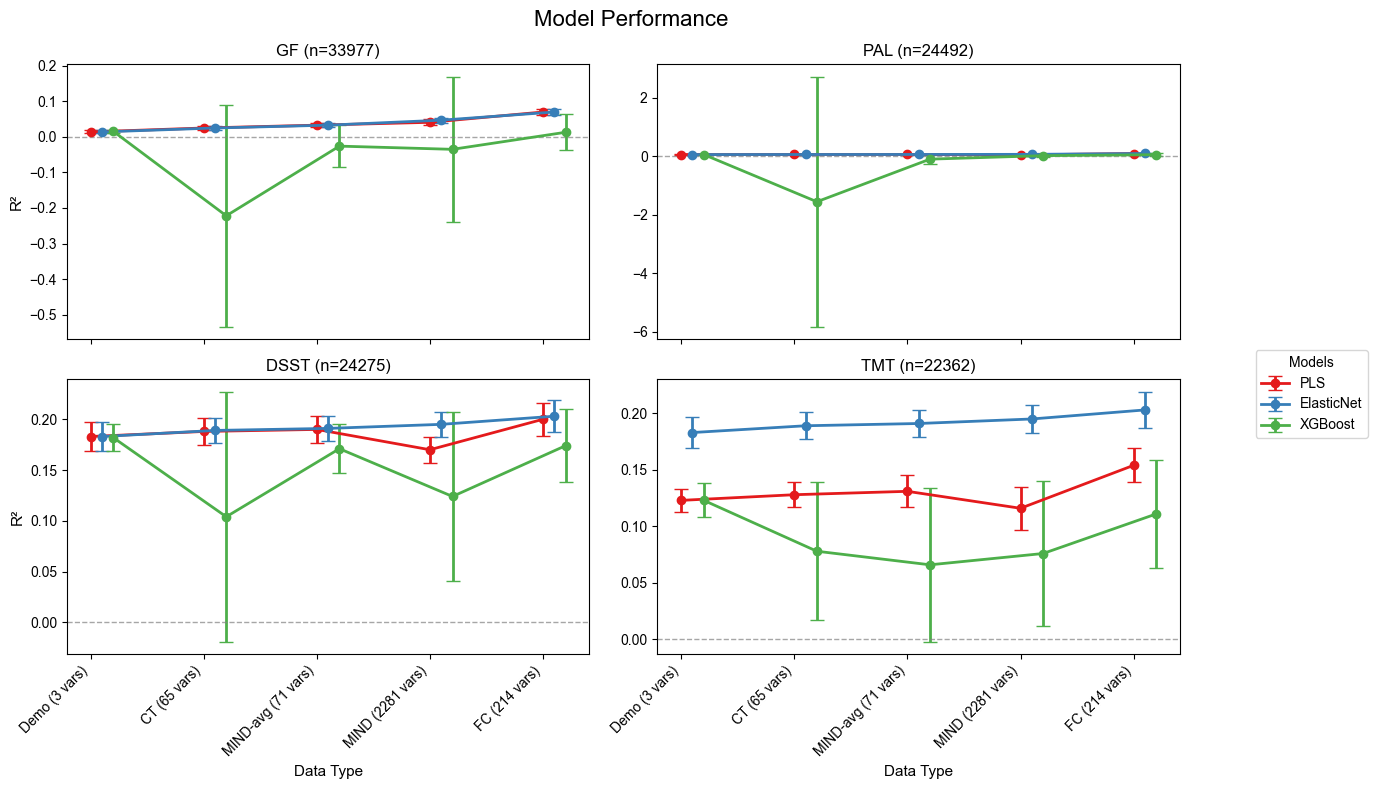

In [126]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # Convert 2D array to 1D for easier indexing

data_order = ['Demo', 'CT', 'MIND-avg', 'MIND', 'FC']

# Number of variables for each data type
num_vars = {'Demo': 3, 'CT': 65, 'MIND-avg': 71, 'MIND': 2281, 'FC': 214}

# Create labels with variable counts
data_labels = [f'{data_type} ({num_vars[data_type]} vars)' for data_type in data_order]

# Sample sizes for each subplot
sample_sizes = [33977, 24492, 24275, 22362]

# Get handles and labels from the first subplot for the legend
handles, labels = None, None

for idx, (sheet_name, df) in enumerate(sheets.items()):
    ax = axes[idx]
    
    unique_models = df[model_col].unique()
    colors = plt.cm.Set1(range(len(unique_models)))

    base_positions = range(len(data_order))
    shift_amount = 0.1

    for i, model in enumerate(unique_models):
        model_df = df[df[model_col] == model]

        x_positions = []
        y_values = []
        y_errors = []

        shifted_position = [pos + i * shift_amount for pos in base_positions]

        for j, data_type in enumerate(data_order):
            row = model_df[model_df[data_col] == data_type]
            if not row.empty:
                x_positions.append(shifted_position[j])
                y_values.append(row[r2_col].iloc[0])
                y_errors.append(row[std_col].iloc[0])
            
        ax.errorbar(x_positions, y_values, yerr=y_errors,
                   label=model, color=colors[i], marker='o',
                   capsize=5, linewidth=2, markersize=6)
    
    # Store handles and labels from the first subplot
    if idx == 0:
        handles, labels = ax.get_legend_handles_labels()
    
    # ax.set_ylim(0, 0.25)
    if idx >= 2:  # Only add x-axis labels for bottom plots (indices 2 and 3)
        ax.set_xlabel('Data Type', fontsize=11)
        ax.set_xticks(base_positions)
        ax.set_xticklabels(data_labels, rotation=45, ha='right', fontsize=10)
    else:  # Remove x-axis labels for top plots (indices 0 and 1)
        ax.set_xticks(base_positions)
        ax.set_xticklabels([])
    
    # Only add y-axis labels for left plots (indices 0 and 2)
    if idx % 2 == 0:
        ax.set_ylabel('R²', fontsize=11)
    
    ax.set_title(f'{sheet_name} (n={sample_sizes[idx]})', fontsize=12)
    
    # Add dotted horizontal line at y=0
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.7, linewidth=1)
    
    # Remove individual legends
    # ax.legend(title='Models', fontsize=8)

# Add overall title to the figure
fig.suptitle('Model Performance', fontsize=16, x=0.53, y=0.98)

# Add a single legend for the entire figure
fig.legend(handles, labels, title='Models', loc='center right', bbox_to_anchor=(1.15, 0.5), fontsize=10, title_fontsize=10)

plt.tight_layout()
plt.show()

# Data Distribution

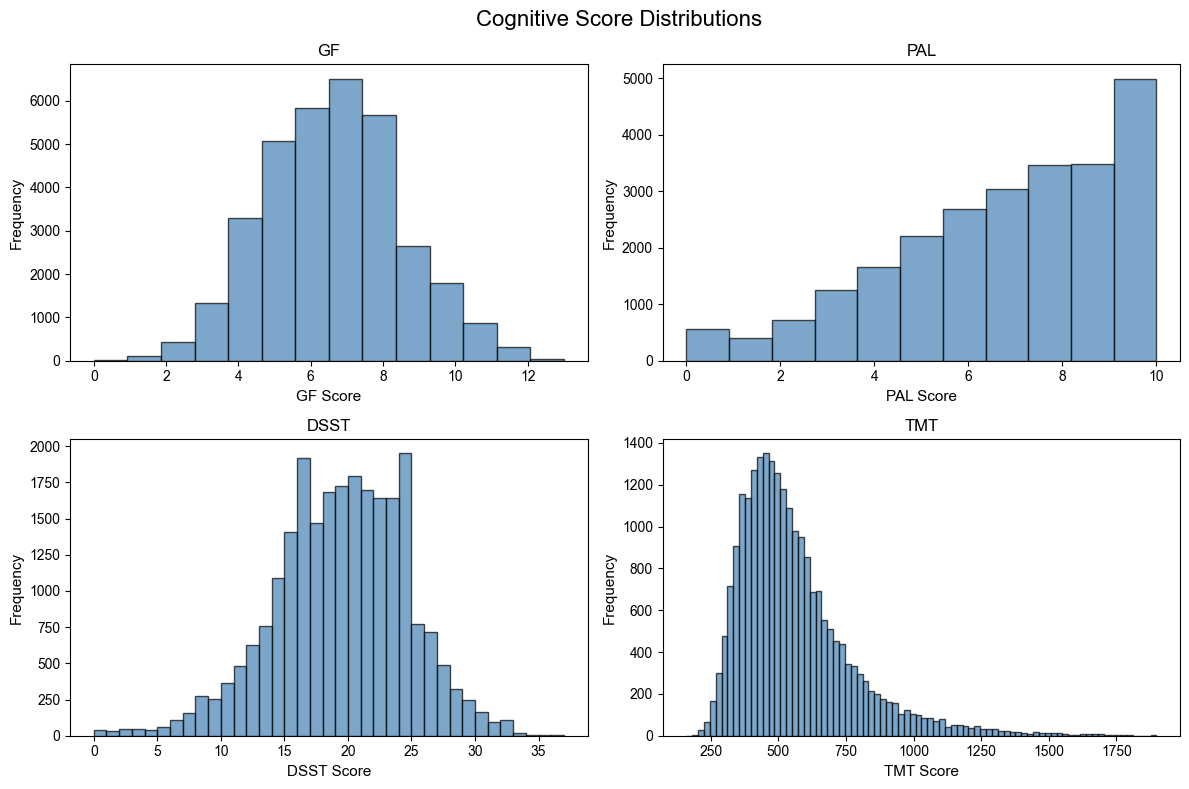

In [123]:
# Data Distribution - Combined 2x2 Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Dataset configurations
datasets = [
    {
        'path': '/Users/baileyng/MIND_data/ukb_cog/ukb_master_GF_no_outliers.csv',
        'column': '20016-2.0',
        'name': 'GF',
        'bins': 14
    },
    {
        'path': '/Users/baileyng/MIND_data/ukb_cog/ukb_master_PAL_no_outliers.csv',
        'column': '20197-2.0',
        'name': 'PAL',
        'bins': 11
    },
    {
        'path': '/Users/baileyng/MIND_data/ukb_cog/ukb_master_DSST_no_outliers.csv',
        'column': '23324-2.0',
        'name': 'DSST',
        'bins': 37
    },
    {
        'path': '/Users/baileyng/MIND_data/ukb_cog/ukb_master_TMT_no_outliers.csv',
        'column': 'trailmaking_score',
        'name': 'TMT',
        'bins': 80
    }
]

for idx, config in enumerate(datasets):
    ax = axes[idx]
    
    # Load the dataset
    df = pd.read_csv(config['path'], index_col=0)
    
    # Create histogram using matplotlib
    ax.hist(df[config['column']], bins=config['bins'], alpha=0.7, color='steelblue', edgecolor='black')
    
    ax.set_title(f'{config["name"]}', fontsize=12)
    ax.set_xlabel(f'{config["name"]} Score', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)

# Add overall title
fig.suptitle('Cognitive Score Distributions', fontsize=16, x=0.52, y=0.98)

plt.tight_layout()
plt.show()